In [2]:
import pandas as pd

In [31]:
from top2vec import Top2Vec

In [26]:
df = pd.read_excel("https://github.com/vtdinh13/testrepo/blob/master/obama_speeches.xlsx?raw=true", index_col = 0)
df

,0
0,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
1,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
2,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
3,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
4,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
...,...
431,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
432,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
433,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...
434,\nAAm\nmeerriiccaannRRhheettoorriicc..ccoom\...


In [3]:
pd.read_excel('https://github.com/emmaschw/mda_assignment_obama/blob/main/obama_speeches.xlsx?raw=true')

HTTPError: HTTP Error 404: Not Found

In [32]:
df = df[0].tolist()

In [33]:
model = Top2Vec(df)

2022-05-16 11:08:17,381 - top2vec - INFO - Pre-processing documents for training
2022-05-16 11:08:21,993 - top2vec - INFO - Creating joint document/word embedding
2022-05-16 11:11:04,554 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-16 11:11:17,582 - top2vec - INFO - Finding dense areas of documents
2022-05-16 11:11:17,611 - top2vec - INFO - Finding topics


In [34]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [35]:
print(topic_sizes)

[132 109 106  45  44]


In [36]:
print(topic_nums)

[0 1 2 3 4]


In [39]:
topic_words, word_scores, topic_scores, topic_nums = model.get_topics()

In [40]:
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words:{words}")

0
Words:['jobs' 'deficit' 'tax' 'businesses' 'afford' 'debt' 'get' 'insurance'
 'spending' 'savings' 'affordable' 'pay' 'care' 'economy' 'health'
 'republicans' 'class' 'cost' 'premiums' 'medicare' 'college' 'cuts' 'job'
 'money' 'deficits' 'plan' 'democrats' 'recession' 'costs' 'budget'
 'loans' 'wealthiest' 'seniors' 'folks' 'medicaid' 'recovery' 'trillion'
 'bill' 'financial' 'coverage' 'mortgage' 'banks' 'reform' 'business'
 'credit' 'balanced' 'consumer' 'bills' 'taxpayers' 'industry']
1
Words:['nations' 'human' 'world' 'peace' 'peaceful' 'countries' 'must'
 'governments' 'peoples' 'united' 'conflict' 'iran' 'region' 'nuclear'
 'europe' 'international' 'israel' 'peacefully' 'democracy' 'societies'
 'democracies' 'economies' 'dignity' 'aspirations' 'engagement' 'between'
 'society' 'freedom' 'conflicts' 'cuba' 'diplomacy' 'asia' 'prosperity'
 'africa' 'development' 'cuban' 'path' 'progress' 'east' 'advance'
 'mutual' 'opportunity' 'americas' 'iranian' 'beings' 'continent'
 'israeli

In [42]:
topic_words, word_scores, topic_nums = model.get_topics(1)
for words, scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words:{words}")

0
Words:['jobs' 'deficit' 'tax' 'businesses' 'afford' 'debt' 'get' 'insurance'
 'spending' 'savings' 'affordable' 'pay' 'care' 'economy' 'health'
 'republicans' 'class' 'cost' 'premiums' 'medicare' 'college' 'cuts' 'job'
 'money' 'deficits' 'plan' 'democrats' 'recession' 'costs' 'budget'
 'loans' 'wealthiest' 'seniors' 'folks' 'medicaid' 'recovery' 'trillion'
 'bill' 'financial' 'coverage' 'mortgage' 'banks' 'reform' 'business'
 'credit' 'balanced' 'consumer' 'bills' 'taxpayers' 'industry']


In [43]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num = 0, num_docs = 10) 
#top 10 most similar documents 

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 196, Score: 0.435711532831192
-----------
  
AAm
meerriiccaannRRhheettoorriicc..ccoom
m  
 
AmericanRhetoric.com 
 
     Page 1 
Barack Obama 
Post Election Address on the Economy 
delivered 9 November 2012 
 
 
AUTHENTICITY CERTIFIED: Text version below transcribed directly from audio 
Thank you. Well, good afternoon, everybody.  Now that those of us on the campaign trail have 
had a chance to get a little sleep -- it’s time to get back to work.  And there is plenty of work 
to do. 
As I said on Tuesday night, the American people voted for action, not politics as usual.  You 
elected us to focus on your jobs, not ours.  And in that spirit, I’ve invited leaders of both 
parties to the White House next week, so we can start to build consensus around the 
challenges that we can only solve together. And I also intend to bring in business and labor 
and civic leaders from all across the country here to Washington to get their ideas and input 
as well. 
At a time when our economy 

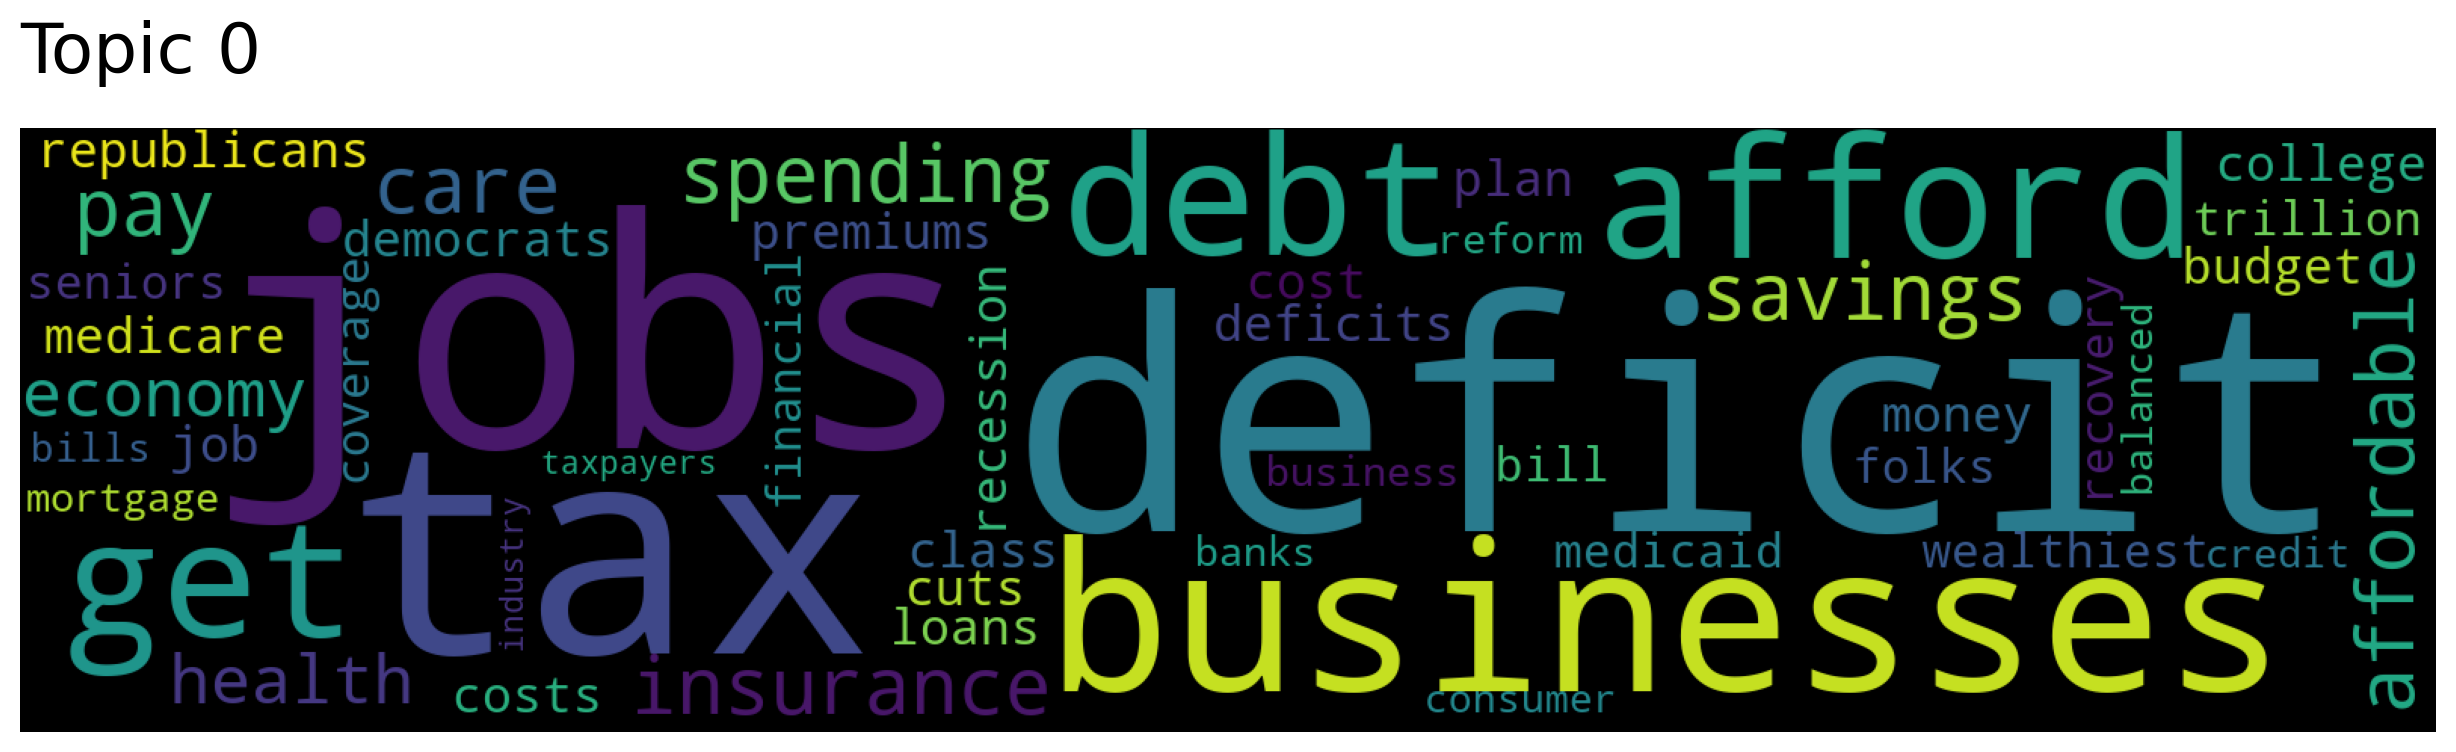

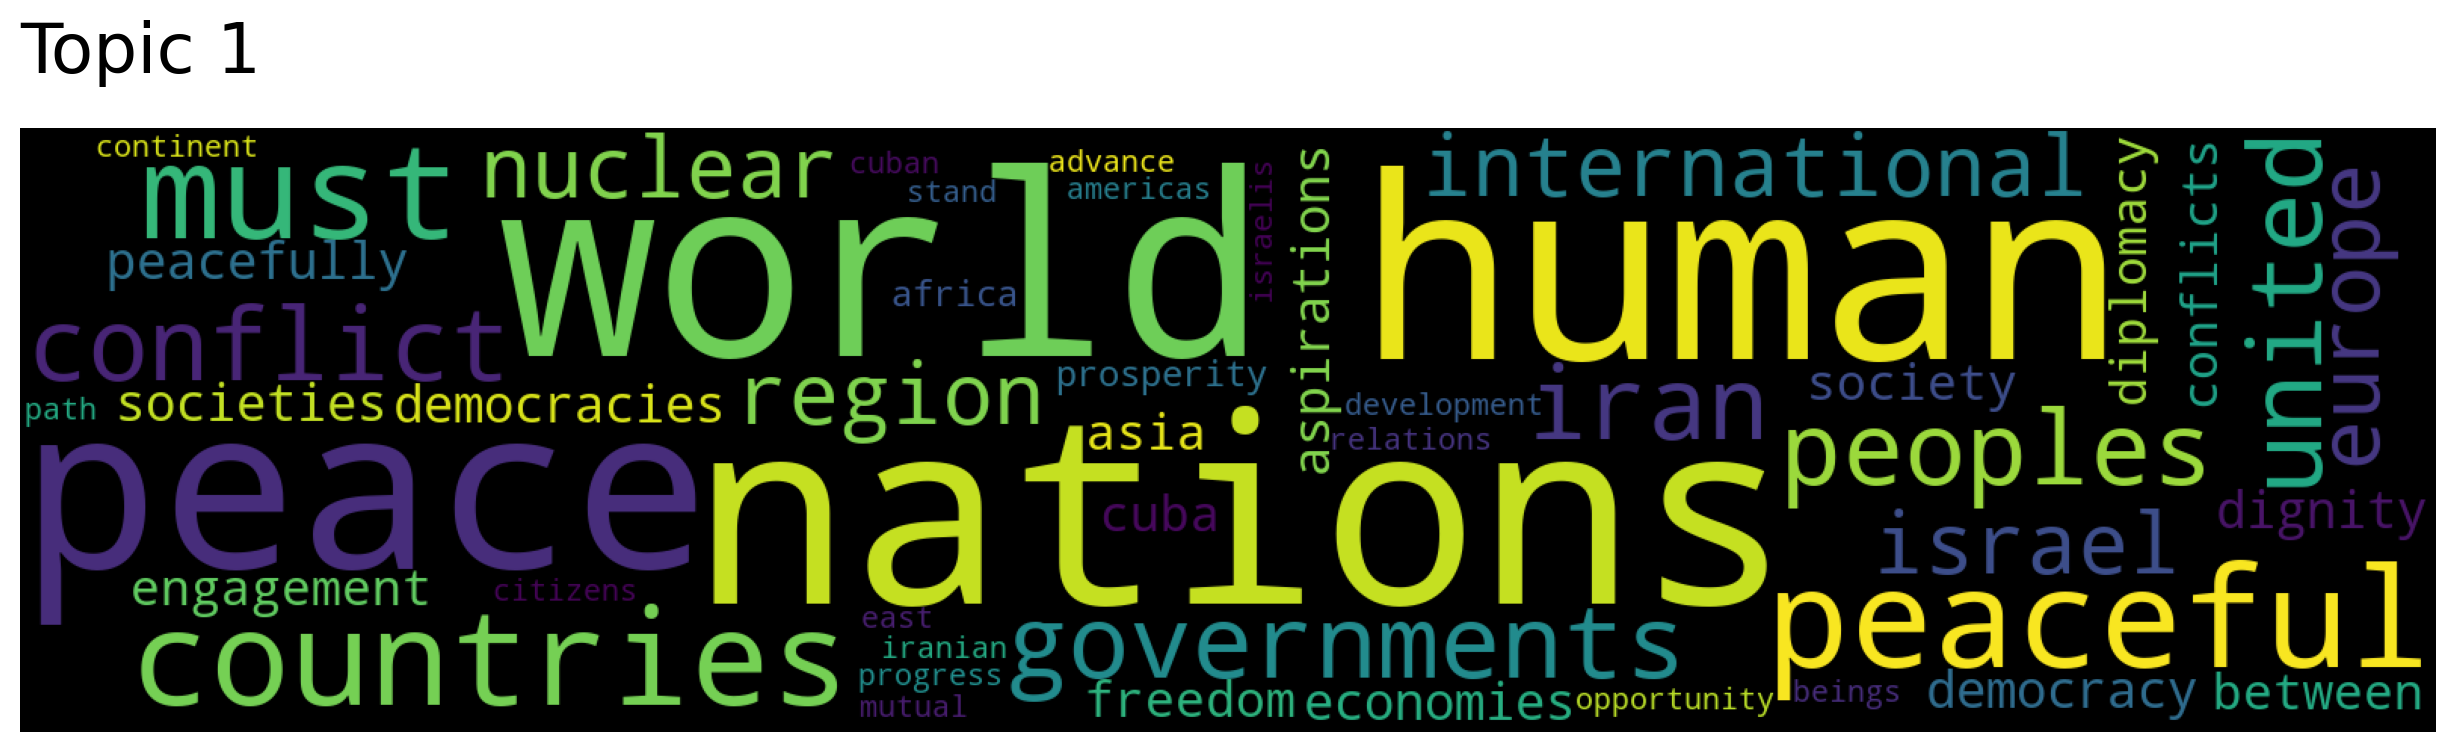

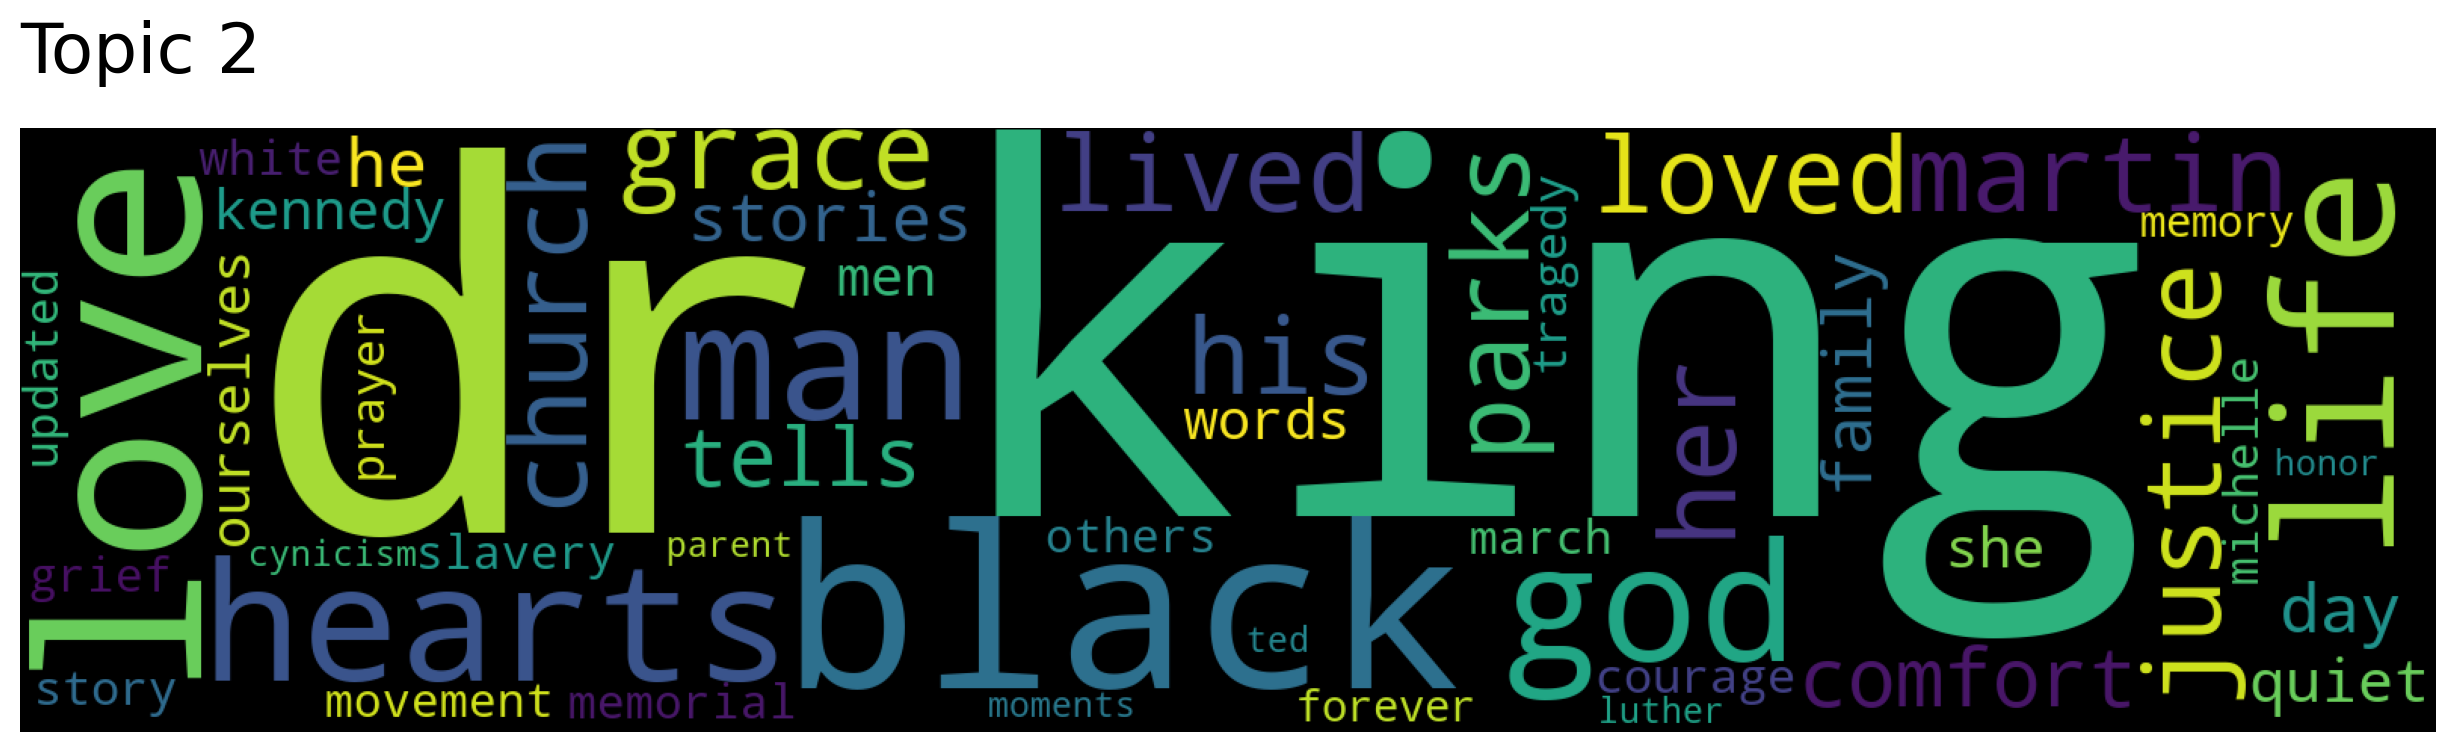

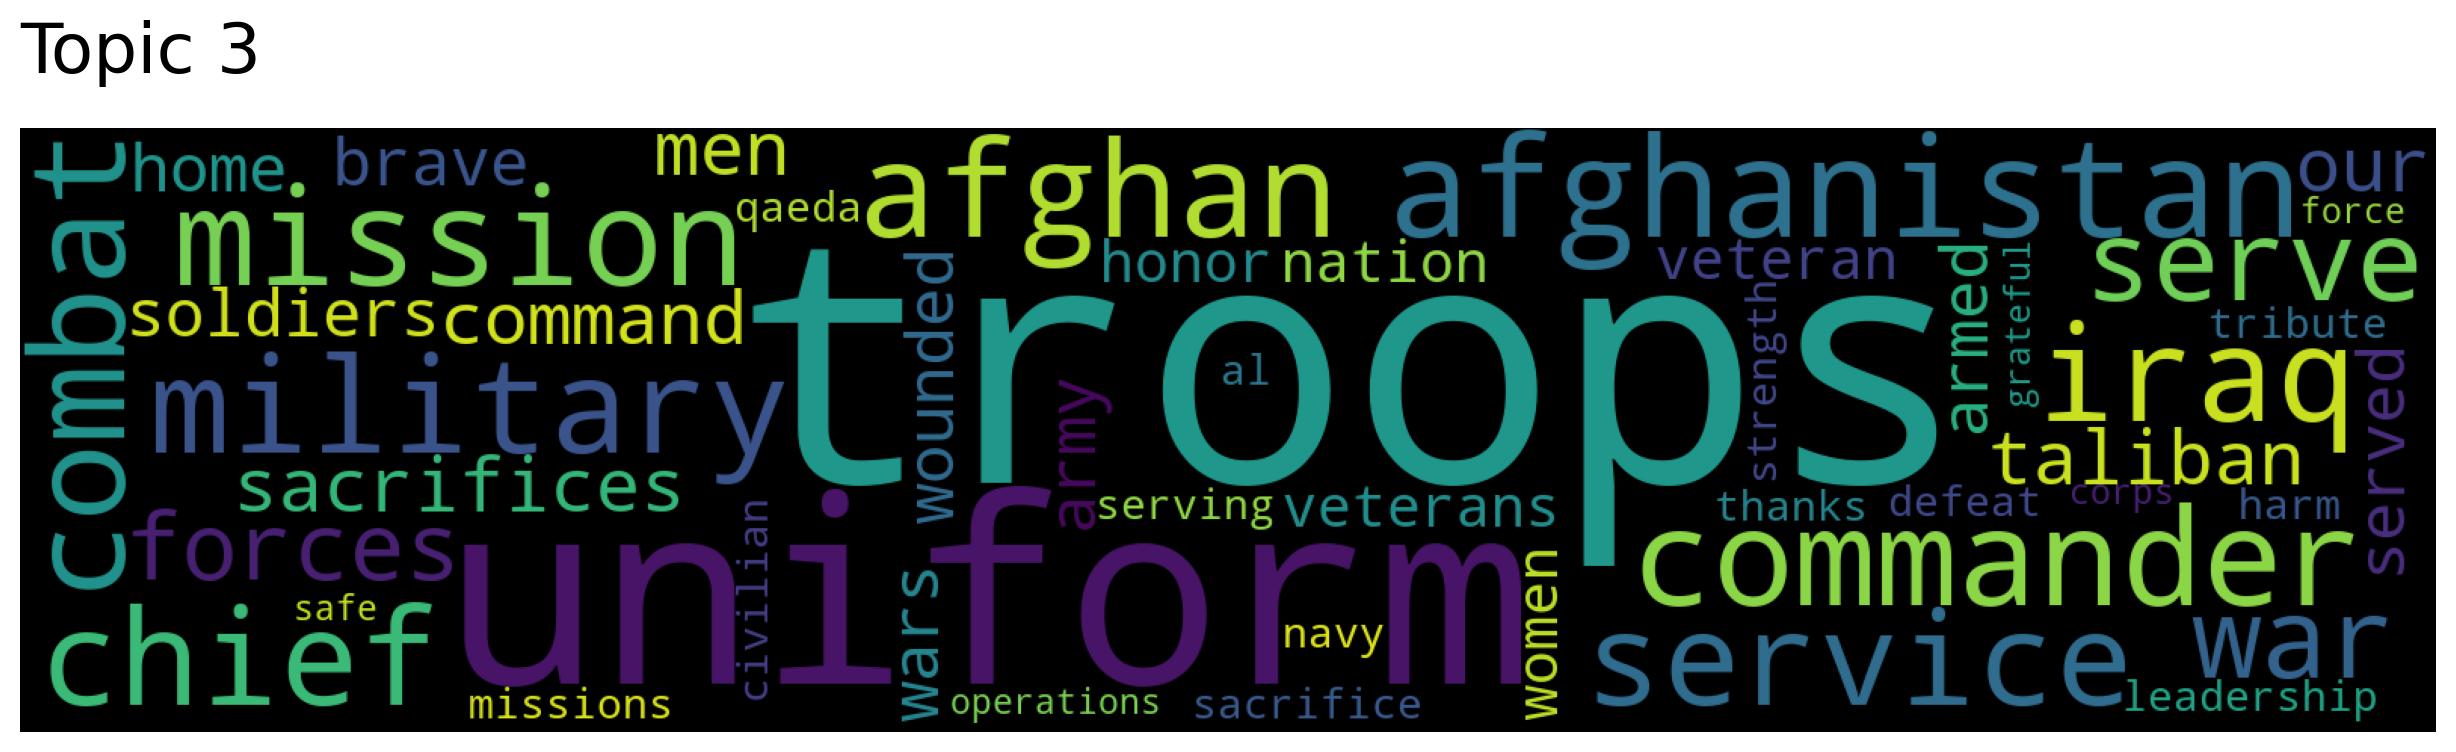

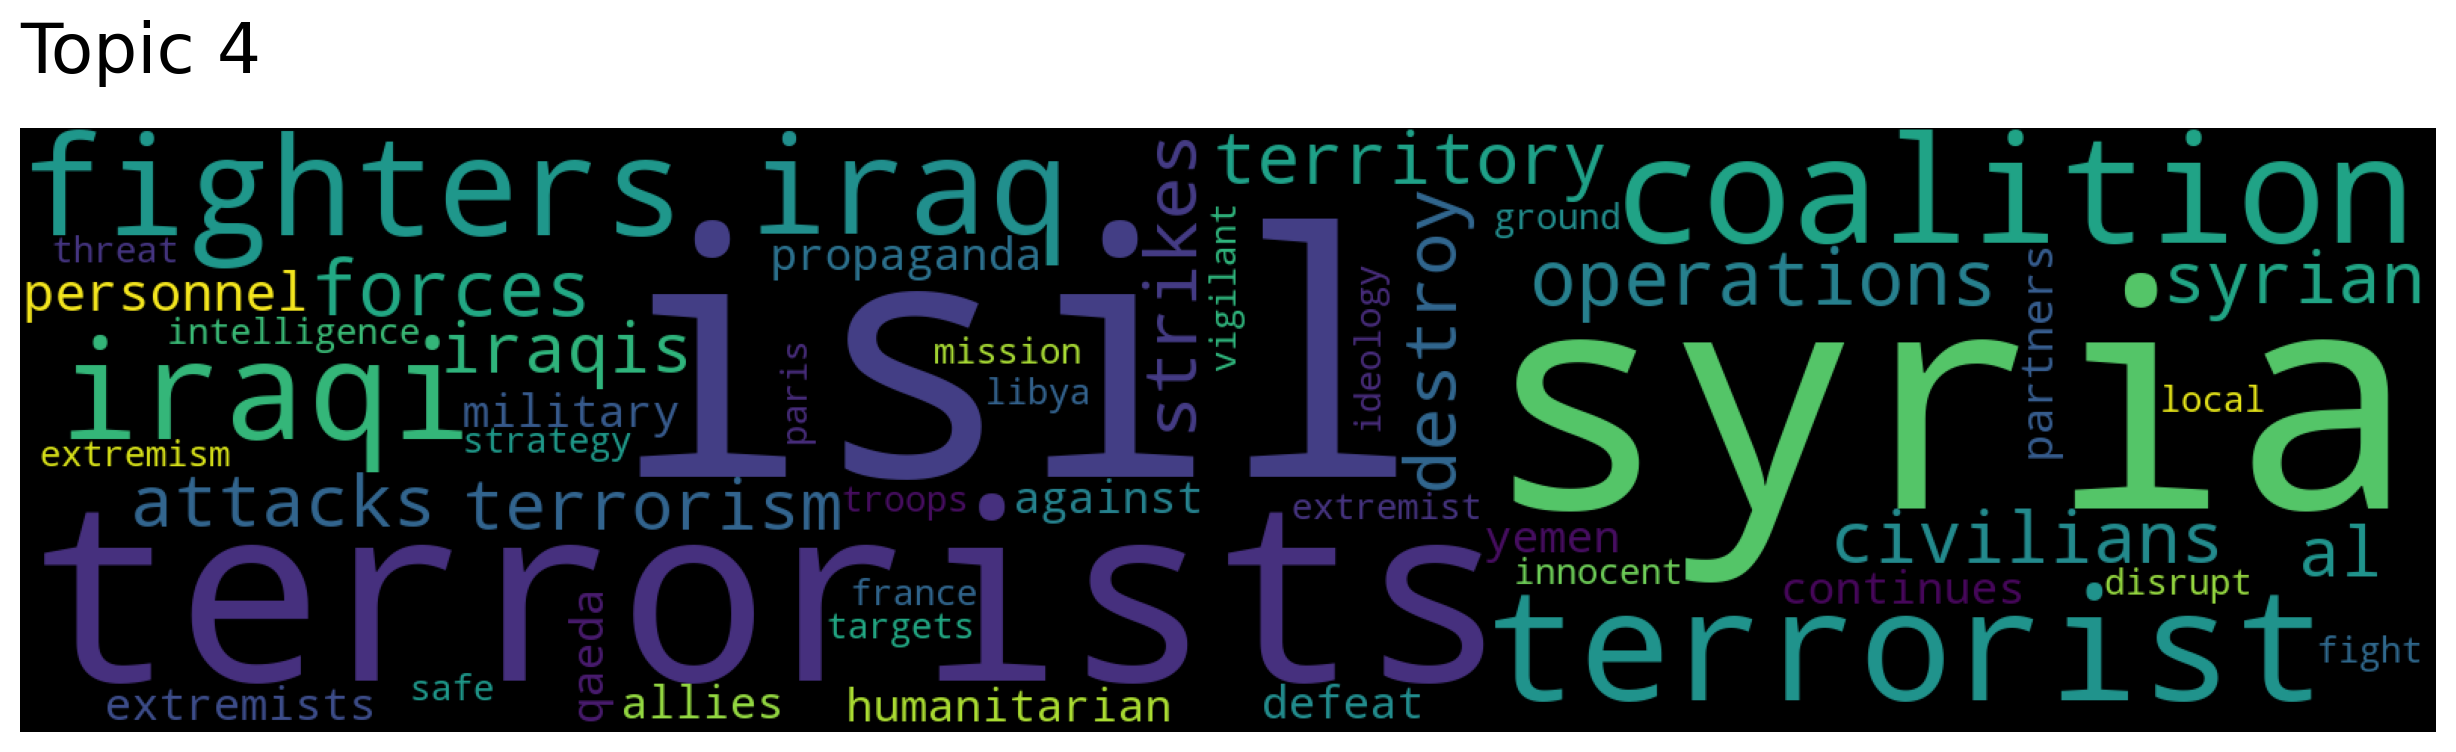

In [50]:
topic_words, word_scores, topic_nums = model.get_topics()
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)